# Regresión lineal: práctica y ejercicios

**NOTAS**
 - Hay muchas formas de resolver cada problema, encuentra la tuya.
 - Crea las celdas extra que necesites.
 - Recuerda que una celda puede ser de tipo Código, o de tipo Markdown. Utiliza las segundas para escribir texto y explicaciones si lo precisas.
 - Intenta crear variables a la hora de resolver los ejercicios.
 - Puedes apoyarte en internet: todos los programadores lo hacemos a diario.

Importamos el dataset *california housing*

In [39]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [40]:
california_housing = fetch_california_housing(as_frame=True)

In [41]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [42]:
df = california_housing.frame

Para nuestro ejercicio de hoy, vamos a eliminar algunos datos de entrada

In [43]:
df.shape

(20640, 9)

In [45]:
df = df[df.MedHouseVal < 5]

In [46]:
df.shape

(19648, 9)

**El objetivo del ejercicio será predecir `MedHouseVal` en función de otras variables**

**La métrica a optimizar será el root mean squared error (RMSE)**

## Exploración de datos

Cada fila es un bloque de casas de California

Explora el dataset como consideres, acompañándo el análisis de plots univariantes / bivariantes

In [48]:
import seaborn as sns

In [49]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: xlabel='MedInc', ylabel='Count'>

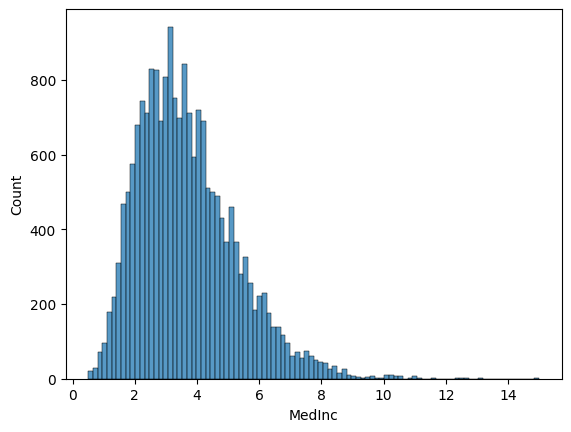

In [50]:
sns.histplot(x=df.MedInc)

<Axes: xlabel='HouseAge', ylabel='Count'>

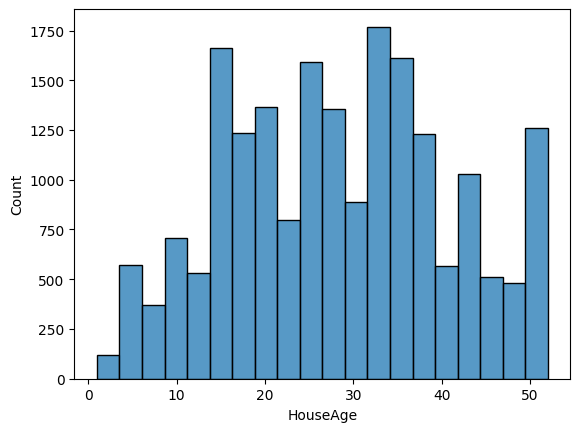

In [54]:
sns.histplot(x=df.HouseAge, bins=20)

<Axes: xlabel='AveRooms', ylabel='Count'>

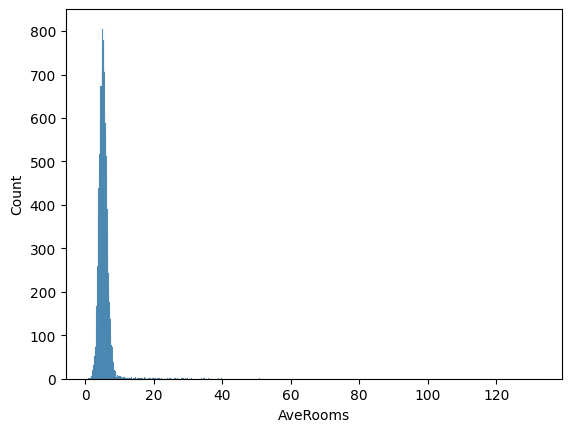

In [55]:
sns.histplot(x=df.AveRooms)

<Axes: xlabel='AveRooms', ylabel='Count'>

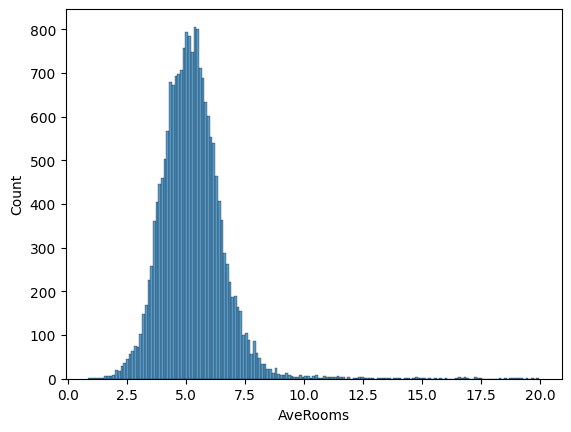

In [56]:
sns.histplot(x=df[df.AveRooms < 20].AveRooms)

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

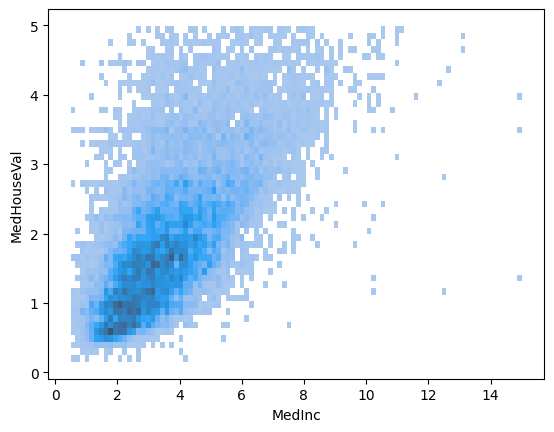

In [57]:
sns.histplot(x=df.MedInc, y=df.MedHouseVal)

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

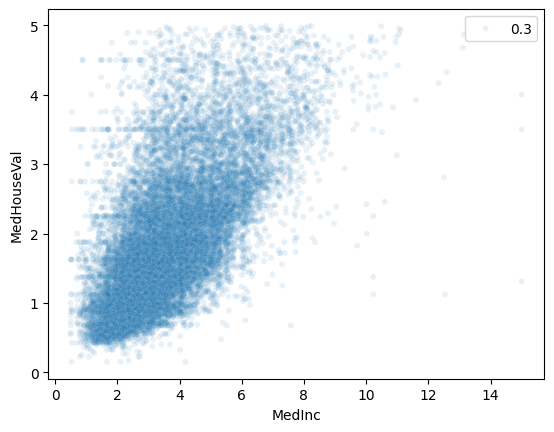

In [61]:
sns.scatterplot(x=df.MedInc, y=df.MedHouseVal, size=0.3, alpha=0.1)

In [62]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: xlabel='Longitude', ylabel='Latitude'>

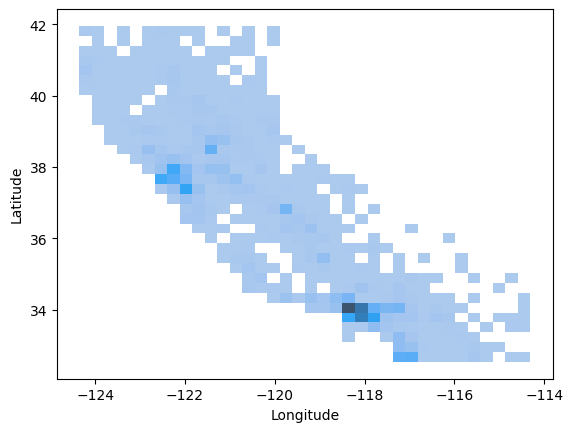

In [63]:
sns.histplot(x=df.Longitude, y=df.Latitude)

In [66]:
df[["Longitude", "MedHouseVal"]].corr()

,Longitude,MedHouseVal
Longitude,1.000000,-0.045733
MedHouseVal,-0.045733,1.000000


Presta especial atención a las variables `MedInc`, `HouseAge`, `AveRooms` y `MedHouseVal`

## Modelos predictivos

### Monta un modelo con un solo predictor: `HouseAge`

Y evalúa su performance

In [68]:
from sklearn.linear_model import LinearRegression

In [72]:
lr = LinearRegression()

In [73]:
lr.fit(X=df[["HouseAge"]], y=df["MedHouseVal"])

LinearRegression()

In [75]:
lr.coef_[0]

0.005058922196355826

In [76]:
lr.intercept_

1.7770161526622927

In [78]:
import matplotlib.pyplot as plt

In [83]:
df[["HouseAge"]].head()

,HouseAge
0,41.0
1,21.0
2,52.0
3,52.0
4,52.0


In [86]:
41 * 0.0050589 + 1.777

1.9844149

In [85]:
lr.predict(df[["HouseAge"]].head()).round(2)

array([1.98, 1.88, 2.04, 2.04, 2.04])

In [89]:
df["pred1"] = lr.predict(df[["HouseAge"]]).round(3)

/tmp/ipykernel_5423/3552030341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pred1"] = lr.predict(df[["HouseAge"]]).round(3)


In [90]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,pred1
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1.984
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1.883
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.040
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.040
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.040


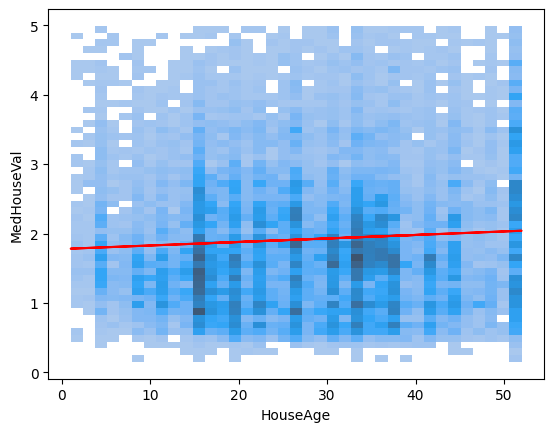

In [91]:
fig, ax = plt.subplots()
sns.histplot(x=df.HouseAge, y=df.MedHouseVal)

plt.plot(df.HouseAge, df.pred1, color='r', label='peor')

<Axes: xlabel='MedHouseVal', ylabel='pred1'>

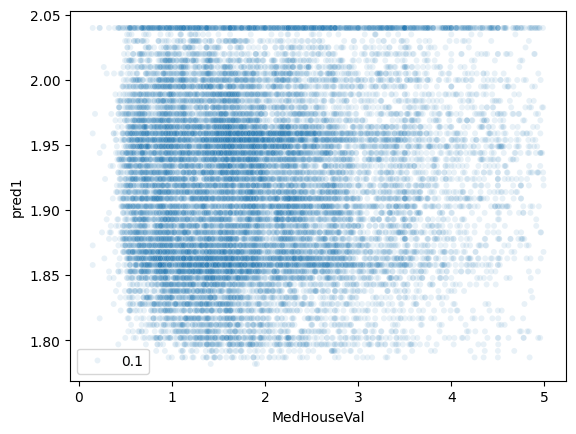

In [93]:
sns.scatterplot(x=df.MedHouseVal, y=df.pred1, size=0.1, alpha=0.1)

In [94]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,pred1
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1.984
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1.883
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.040
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.040
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.040


MSE

In [161]:
mse = ((df.MedHouseVal - df.pred1) ** 2).mean().round(3)

In [162]:
mse

0.939

RMSE

In [163]:
rmse = (mse ** 0.5).round(3)

In [164]:
rmse

0.969

In [115]:
lr.score(df[["HouseAge"]], df.MedHouseVal).round(4)

0.0042

### Monta un modelo con un solo predictor: `MedInc`

Y evalúa su performance

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

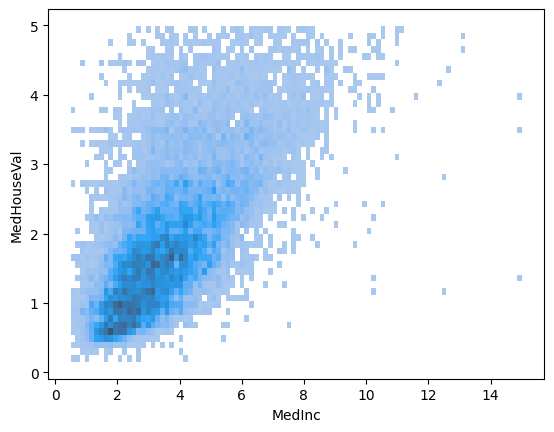

In [116]:
sns.histplot(x=df.MedInc, y=df.MedHouseVal)

In [117]:
lr = LinearRegression()

In [119]:
lr.fit(X=df[["MedInc"]], y=df["MedHouseVal"])

LinearRegression()

In [120]:
lr.coef_[0]

0.39986877559792156

In [121]:
lr.intercept_

0.4504714514861494

In [122]:
df[["MedInc"]].head()

,MedInc
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462


In [123]:
lr.predict(df[["MedInc"]].head()).round(2)

array([3.78, 3.77, 3.35, 2.71, 1.99])

In [125]:
df["pred2"] = lr.predict(df[["MedInc"]]).round(3)

/tmp/ipykernel_5423/1165387808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pred2"] = lr.predict(df[["MedInc"]]).round(3)


In [126]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,pred1,pred2
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1.984,3.779
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1.883,3.770
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.040,3.352
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.040,2.707
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.040,1.988


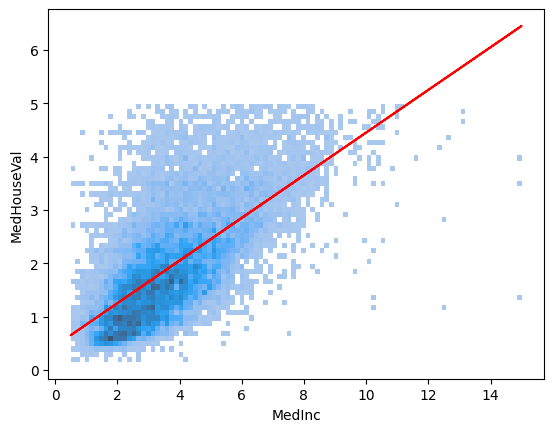

In [127]:
fig, ax = plt.subplots()
sns.histplot(x=df.MedInc, y=df.MedHouseVal)

plt.plot(df.MedInc, df.pred2, color='r')

<Axes: xlabel='MedHouseVal', ylabel='pred2'>

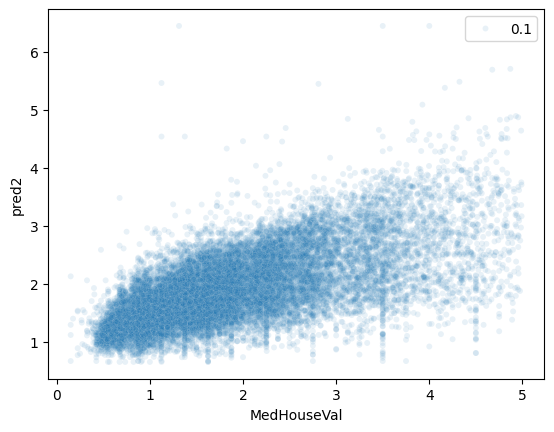

In [129]:
sns.scatterplot(x=df.MedHouseVal, y=df.pred2, size=0.1, alpha=0.1)

In [94]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,pred1
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1.984
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1.883
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.040
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.040
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.040


MSE

In [165]:
mse = ((df.MedHouseVal - df.pred2) ** 2).mean().round(3)

In [166]:
mse

0.549

RMSE

In [167]:
rmse = (mse ** 0.5).round(3)

In [168]:
rmse

0.741

In [135]:
lr.score(df[["MedInc"]], df.MedHouseVal).round(4)

0.4182

### Monta un modelo con los 3 predictores `MedInc`, `HouseAge`, `AveRooms`

Y evalúa su performance

In [138]:
lr = LinearRegression()

In [139]:
lr.fit(X=df[["MedInc", "HouseAge", "AveRooms"]], y=df["MedHouseVal"])

LinearRegression()

In [143]:
df.sample()[["MedInc", "HouseAge", "AveRooms"]]

,MedInc,HouseAge,AveRooms
13604,3.7125,31.0,5.33635


In [141]:
lr.coef_

array([ 0.44003083,  0.01465751, -0.03646465])

In [144]:
lr.intercept_

0.08245365335026222

In [145]:
df[["MedInc", "HouseAge", "AveRooms"]].head()

,MedInc,HouseAge,AveRooms
0,8.3252,41.0,6.984127
1,8.3014,21.0,6.238137
2,7.2574,52.0,8.288136
3,5.6431,52.0,5.817352
4,3.8462,52.0,6.281853


In [146]:
lr.predict(df[["MedInc", "HouseAge", "AveRooms"]].head()).round(2)

array([4.09, 3.82, 3.74, 3.12, 2.31])

In [148]:
df["pred3"] = lr.predict(df[["MedInc", "HouseAge", "AveRooms"]]).round(3)

/tmp/ipykernel_5423/2821304100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pred3"] = lr.predict(df[["MedInc", "HouseAge", "AveRooms"]]).round(3)


In [149]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,pred1,pred2,pred3
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1.984,3.779,4.092
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1.883,3.770,3.816
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.040,3.352,3.736
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.040,2.707,3.116
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.040,1.988,2.308


<Axes: xlabel='MedHouseVal', ylabel='pred3'>

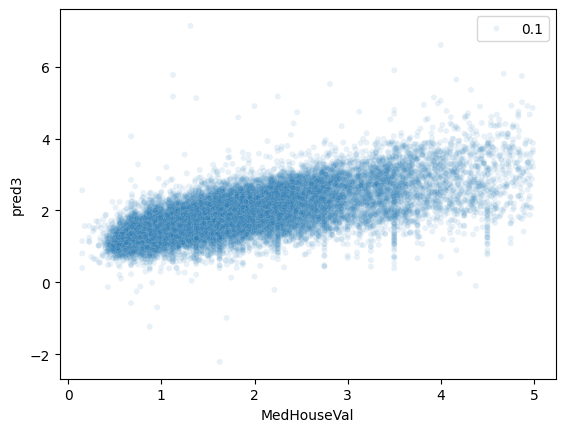

In [150]:
sns.scatterplot(x=df.MedHouseVal, y=df.pred3, size=0.1, alpha=0.1)

MSE

In [169]:
mse = ((df.MedHouseVal - df.pred3) ** 2).mean().round(3)

In [170]:
mse

0.506

RMSE

In [171]:
rmse = (mse ** 0.5).round(3)

In [172]:
rmse

0.711

In [173]:
lr.score(df[["MedInc", "HouseAge", "AveRooms"]], df.MedHouseVal).round(4)

0.4629

### Monta un modelo con todas las variables como predictoras

Y evalúa su performance

In [184]:
dff = df.drop(["MedHouseVal", "pred1", "pred2", "pred3"], axis=1).copy()

In [186]:
dff.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [188]:
lr = LinearRegression()

In [189]:
lr.fit(X=dff, y=df["MedHouseVal"])

LinearRegression()

In [190]:
dff.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [191]:
lr.predict(dff.head()).round(2)

array([4.01, 3.9 , 3.54, 3.12, 2.3 ])

In [192]:
df["pred4"] = lr.predict(dff).round(3)

/tmp/ipykernel_5423/1255940592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pred4"] = lr.predict(dff).round(3)


In [193]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,pred1,pred2,pred3,pred4
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1.984,3.779,4.092,4.010
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1.883,3.770,3.816,3.904
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.040,3.352,3.736,3.543
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.040,2.707,3.116,3.120
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.040,1.988,2.308,2.302


<Axes: xlabel='MedHouseVal', ylabel='pred4'>

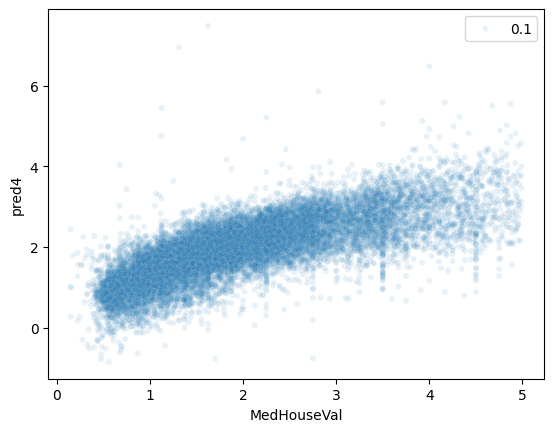

In [194]:
sns.scatterplot(x=df.MedHouseVal, y=df.pred4, size=0.1, alpha=0.1)

MSE

In [195]:
mse = ((df.MedHouseVal - df.pred4) ** 2).mean().round(3)

In [196]:
mse

0.401

RMSE

In [197]:
rmse = (mse ** 0.5).round(3)

In [198]:
rmse

0.633

In [200]:
lr.score(dff, df.MedHouseVal).round(4)

0.5743

En qué bloques de casas comete mayor error tu modelo?

In [202]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,pred1,pred2,pred3,pred4
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1.984,3.779,4.092,4.010
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1.883,3.770,3.816,3.904
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.040,3.352,3.736,3.543
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.040,2.707,3.116,3.120
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.040,1.988,2.308,2.302


In [203]:
df["err4"] = (df.MedHouseVal - df.pred4) ** 2

/tmp/ipykernel_5423/2519878056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["err4"] = (df.MedHouseVal - df.pred4) ** 2


In [204]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,pred1,pred2,pred3,pred4,err4
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1.984,3.779,4.092,4.010,0.266256
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1.883,3.770,3.816,3.904,0.101761
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.040,3.352,3.736,3.543,0.000484
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.040,2.707,3.116,3.120,0.085849
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.040,1.988,2.308,2.302,1.254400


In [205]:
df.sort_values("err4")

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,pred1,pred2,pred3,pred4,err4
18179,3.8464,17.0,3.699692,1.068923,3539.0,2.177846,37.36,-122.00,2.394,1.863,1.989,1.889,2.394,0.000000
2390,3.9141,12.0,6.946387,1.153846,1184.0,2.759907,36.91,-119.46,1.239,1.838,2.016,1.727,1.239,0.000000
16988,6.7474,16.0,6.276540,1.069463,1840.0,2.411533,37.55,-122.27,3.382,1.858,3.149,3.057,3.382,0.000000
19209,2.3140,42.0,4.265583,1.018970,844.0,2.287263,38.46,-122.71,1.694,1.989,1.376,1.561,1.694,0.000000
3478,6.3911,29.0,6.717908,1.034865,1890.0,2.995246,34.28,-118.51,3.017,1.924,3.006,3.075,3.017,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19542,1.7679,39.0,5.000000,0.888889,22.0,2.444444,37.63,-120.92,4.500,1.974,1.157,1.250,0.881,13.097161
4492,10.2264,52.0,4.800000,0.600000,41.0,4.100000,34.06,-118.22,1.125,2.040,4.540,5.170,4.756,13.184161
11912,12.5381,29.0,6.888889,1.222222,50.0,2.777778,33.96,-117.44,1.125,1.924,5.464,5.773,5.450,18.705625
18501,15.0001,52.0,8.461538,1.230769,55.0,2.115385,37.19,-121.59,1.313,2.040,6.449,7.137,6.948,31.753225
